In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
engine = create_engine('sqlite:///:memory:')

In [3]:
# Read the two CSVs
balls_data = pd.read_csv('/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Ball_by_Ball_2008_2022.csv')
match_data = pd.read_csv('/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Matches_2008_2022.csv')

In [4]:
#Write the tables to SQL so that we can query them when necessary
balls_data.to_sql('balls', engine)
match_data.to_sql('matches', engine)

950

In [5]:
balls_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
balls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

In [7]:
balls_data.isna().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [8]:
match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [9]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [10]:
match_data.isna().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

# Batsman stats


In [11]:
query = """
WITH match_stats AS (
     SELECT batter, 
            SUM(CASE
            WHEN batsman_run = 4 THEN 1
            ELSE 0
            END) AS no_of_fours,
            SUM(CASE
            WHEN batsman_run = 6 THEN 1
            ELSE 0
            END) AS no_of_sixes,
            SUM(total_run) AS score
    FROM balls
    GROUP BY batter, ID
    )
SELECT batter, SUM(no_of_fours) AS total_fours, SUM(no_of_sixes) AS total_sixes, SUM(score) AS total_runs
FROM match_stats
GROUP BY batter
"""
batsman_stats = pd.read_sql(query, engine)
batsman_stats

,batter,total_fours,total_sixes,total_runs
0,A Ashish Reddy,16,15,288
1,A Badoni,11,7,173
2,A Chandila,0,0,4
3,A Chopra,7,0,58
4,A Choudhary,1,1,25
...,...,...,...,...
600,Yash Dayal,0,0,0
601,Yashpal Singh,5,0,49
602,Younis Khan,0,0,3
603,Yuvraj Singh,218,149,2884


In [12]:
batsman_stats.to_sql('batsman_stats', engine)

605

**Top 10 batsmen in terms of score**

In [13]:
query = """
SELECT batter, total_runs
FROM batsman_stats
ORDER BY 2 DESC
LIMIT 10
"""
top_10_batsmen = pd.read_sql(query, engine)
top_10_batsmen

,batter,total_runs
0,V Kohli,6876
1,S Dhawan,6561
2,DA Warner,6191
3,RG Sharma,6083
4,SK Raina,5780
5,AB de Villiers,5354
6,CH Gayle,5336
7,RV Uthappa,5246
8,MS Dhoni,5221
9,KD Karthik,4572


In [14]:
top_10_batsmen.to_sql('top_10_batsmen', engine)

10

**The highest six scorers in IPL**

In [15]:
query = """
SELECT batter, total_sixes
FROM batsman_stats
ORDER BY 2 DESC
LIMIT 10;
"""
highest_six_scorers = pd.read_sql(query, engine)
highest_six_scorers

,batter,total_sixes
0,CH Gayle,359
1,AB de Villiers,253
2,RG Sharma,241
3,MS Dhoni,229
4,KA Pollard,224
5,V Kohli,219
6,DA Warner,216
7,SK Raina,204
8,SR Watson,190
9,RV Uthappa,182


# Highest four scorers in IPL

In [16]:
query = """
SELECT batter, total_fours
FROM batsman_stats
ORDER BY 2 DESC
LIMIT 10;
"""
highest_four_scorers = pd.read_sql(query, engine)
highest_four_scorers

,batter,total_fours
0,S Dhawan,701
1,V Kohli,581
2,DA Warner,577
3,RG Sharma,519
4,SK Raina,506
5,G Gambhir,492
6,RV Uthappa,481
7,AM Rahane,431
8,KD Karthik,426
9,AB de Villiers,414


# Team Statistics

In [17]:
query = """
SELECT BattingTeam, 
            SUM(CASE
            WHEN batsman_run = 6 THEN 1
            ELSE 0
            END) AS no_of_sixes,
            SUM(CASE
            WHEN batsman_run = 4 THEN 1
            ELSE 0
            END) AS no_of_fours
FROM balls
GROUP BY BattingTeam
ORDER BY 2 DESC
LIMIT 10
"""

pd.read_sql(query, engine)

,BattingTeam,no_of_sixes,no_of_fours
0,Mumbai Indians,1412,3157
1,Royal Challengers Bangalore,1381,2947
2,Chennai Super Kings,1269,2790
3,Kolkata Knight Riders,1229,3021
4,Kings XI Punjab,1075,2631
5,Rajasthan Royals,1013,2640
6,Delhi Daredevils,801,2156
7,Sunrisers Hyderabad,780,1972
8,Deccan Chargers,400,957
9,Delhi Capitals,348,913


In [18]:
query = """
WITH match_stats AS (
     SELECT BattingTeam, 
            SUM(CASE
            WHEN batsman_run = 6 THEN 1
            ELSE 0
            END) AS no_of_sixes
    FROM balls
    GROUP BY BattingTeam
    ORDER BY 2 DESC
    LIMIT 10
    )
SELECT BattingTeam, SUM(no_of_sixes) AS total_sixes, ROUND(SUM(no_of_sixes) * 100.0 / (SELECT SUM(no_of_sixes) FROM match_stats), 1) AS percent_sixes
FROM match_stats
GROUP BY BattingTeam
ORDER BY 2 DESC
"""
team_stats = pd.read_sql(query, engine)
team_stats

,BattingTeam,total_sixes,percent_sixes
0,Mumbai Indians,1412,14.5
1,Royal Challengers Bangalore,1381,14.2
2,Chennai Super Kings,1269,13.1
3,Kolkata Knight Riders,1229,12.7
4,Kings XI Punjab,1075,11.1
5,Rajasthan Royals,1013,10.4
6,Delhi Daredevils,801,8.3
7,Sunrisers Hyderabad,780,8.0
8,Deccan Chargers,400,4.1
9,Delhi Capitals,348,3.6


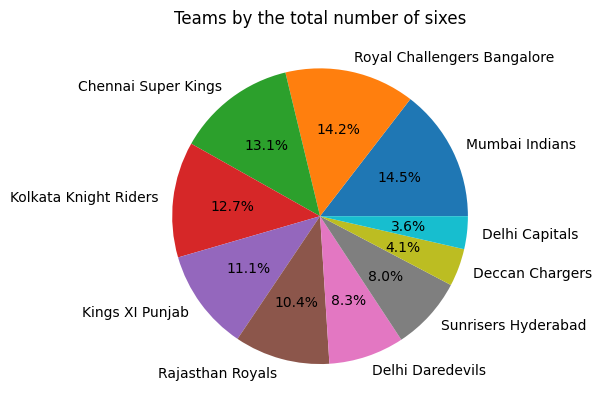

In [19]:
plt.title('Teams by the total number of sixes')
plt.pie(team_stats['total_sixes'], labels=team_stats['BattingTeam'], autopct='%1.1f%%')
plt.show()

In [20]:
query = """
WITH match_stats AS (
     SELECT batter, 
            SUM(CASE
            WHEN batsman_run = 4 THEN 1
            ELSE 0
            END) AS no_of_fours
    FROM balls
    GROUP BY batter, ID
    )
SELECT batter, SUM(no_of_fours) AS total_fours
FROM match_stats
GROUP BY batter
ORDER BY 2 DESC
LIMIT 10;
"""
pd.read_sql(query, engine)

,batter,total_fours
0,S Dhawan,701
1,V Kohli,581
2,DA Warner,577
3,RG Sharma,519
4,SK Raina,506
5,G Gambhir,492
6,RV Uthappa,481
7,AM Rahane,431
8,KD Karthik,426
9,AB de Villiers,414


In [21]:
# Is the is_wicket property set correctly?
query = """
SELECT player_out, isWicketDelivery
FROM balls
WHERE player_out IS NOT NULL AND isWicketDelivery = 0
"""
pd.read_sql(query, engine)

,player_out,isWicketDelivery


In [22]:
# Which 10 batsmen were dismissed the most?
query = """
SELECT batter, COUNT(*) AS num_dismissals
FROM balls
WHERE isWicketDelivery = 1 AND player_out = batter
GROUP BY 1
ORDER By 2 DESC
"""
dismissals = pd.read_sql(query, engine)
dismissals

,batter,num_dismissals
0,RG Sharma,192
1,V Kohli,181
2,RV Uthappa,175
3,S Dhawan,173
4,SK Raina,162
...,...,...
560,AA Chavan,1
561,A Uniyal,1
562,A Tomar,1
563,A Nortje,1


In [23]:
dismissals.to_sql("dismissals", engine)

565

In [24]:
# What teams have played in IPL so far?
query = """
WITH teams AS 
(SELECT DISTINCT Team1 AS team
FROM matches
UNION 
SELECT DISTINCT Team2 AS team
FROM matches)
SELECT DISTINCT team
FROM teams
"""
# The union is not strictly necessary as each team should have appeared within team1 and team2, but it's just a sanity check
teams_in_ipl = pd.read_sql(query, engine)
teams_in_ipl

,team
0,Chennai Super Kings
1,Deccan Chargers
2,Delhi Capitals
3,Delhi Daredevils
4,Gujarat Lions
5,Gujarat Titans
6,Kings XI Punjab
7,Kochi Tuskers Kerala
8,Kolkata Knight Riders
9,Lucknow Super Giants


We can see that Rising Pune Supergiant appears as two seperate teams. They should be merged together

In [25]:
match_data.loc[match_data['Team1'] == 'Rising Pune Supergiant', 'Team1'] = 'Rising Pune Supergiants'
match_data.loc[match_data['Team2'] == 'Rising Pune Supergiant', 'Team2'] = 'Rising Pune Supergiants'

In [26]:
match_data.to_sql('matches', engine, if_exists='replace')

950

In [27]:
balls_data.loc[balls_data['BattingTeam'] == 'Rising Pune Supergiant', 'BattingTeam'] = 'Rising Pune Supergiants'
balls_data.loc[balls_data['BattingTeam'] == 'Rising Pune Supergiant', 'BattingTeam'] = 'Rising Pune Supergiants'

In [28]:
balls_data.to_sql('balls', engine, if_exists='replace')

225954

In [29]:
teams_in_ipl = pd.read_sql(query, engine)
teams_in_ipl

,team
0,Chennai Super Kings
1,Deccan Chargers
2,Delhi Capitals
3,Delhi Daredevils
4,Gujarat Lions
5,Gujarat Titans
6,Kings XI Punjab
7,Kochi Tuskers Kerala
8,Kolkata Knight Riders
9,Lucknow Super Giants


In [30]:
teams_in_ipl.to_sql('teams', engine, if_exists='replace')

17

### Which teams have the won the highest percentages of matches they have played?

In [31]:
query = """
WITH win_stats AS (
    SELECT Team1 AS team, COUNT(*) AS num_wins
    FROM matches
    WHERE Team1 = WinningTeam
    GROUP BY 1
    UNION
    SELECT Team2 AS team, COUNT(*) AS num_wins
    FROM matches
    WHERE Team2 = WinningTeam
    GROUP BY 1
), lose_stats AS (
    SELECT Team1 AS team, COUNT(*) AS num_lose
    FROM matches
    WHERE Team1 <> WinningTeam
    GROUP BY 1
    UNION
    SELECT Team2 AS team, COUNT(*) AS num_lose
    FROM matches
    WHERE Team2 <> WinningTeam
    GROUP BY 1
)
SELECT W.team, SUM(W.num_wins) AS total_wins, SUM(L.num_lose) AS total_lose, (SUM(W.num_wins) * 100.00)/(SUM(W.num_wins) + SUM(L.num_lose)) AS win_percent
FROM win_stats W JOIN lose_stats L
ON W.team = L.team
GROUP BY W.team
ORDER BY win_percent DESC;
"""
team_win_lose_stats = pd.read_sql(query, engine)
team_win_lose_stats

,team,total_wins,total_lose,win_percent
0,Gujarat Titans,24,8,75.000000
1,Lucknow Super Giants,18,12,60.000000
2,Chennai Super Kings,242,174,58.173077
3,Delhi Capitals,72,54,57.142857
4,Mumbai Indians,262,200,56.709957
5,Kolkata Knight Riders,228,218,51.121076
6,Rajasthan Royals,192,188,50.526316
7,Sunrisers Hyderabad,150,154,49.342105
8,Royal Challengers Bangalore,218,228,48.878924
9,Punjab Kings,26,30,46.428571


### What is the probability that the team that wins the toss wins the matches?

In [32]:
query = """
WITH toss_win AS (
    SELECT COUNT(*) AS num_win
    FROM matches
    WHERE TossWinner = WinningTeam
)
SELECT toss_win.num_win * 100.00 / COUNT(*) AS prob_win_match_based_on_toss
FROM matches, toss_win
GROUP BY toss_win.num_win;
"""
pd.read_sql(query, engine)

,prob_win_match_based_on_toss
0,51.473684


### What is the probability that the team that chose to field after winning the toss won the matches?

In [33]:
query = """
WITH toss_field_win AS (
    SELECT COUNT(*) AS num_win
    FROM matches
    WHERE TossWinner = WinningTeam AND TossDecision = 'field'
)
SELECT toss_field_win.num_win * 100.00 / COUNT(*) AS prob_win_match_based_on_field
FROM matches, toss_field_win
GROUP BY toss_field_win.num_win;
"""
pd.read_sql(query, engine)

,prob_win_match_based_on_field
0,34.736842


The probability that the team that chose to bat won the matches can be calculated by subtracting this probability from the first one i.e. 51.473684 - 34.736842 = 16.74 approximately. We can see that the teams that choose to field after winning the toss have a higher chance of winning

I think that the venue for the match is the home ground for team 1. Let me test that hypothesis

In [34]:
# Testing the hypothesis that venue is the home ground for team 1
query = """
SELECT Venue, Team1
FROM matches
GROUP BY 1, 2
"""
pd.read_sql(query, engine)

,Venue,Team1
0,Arun Jaitley Stadium,Delhi Capitals
1,Arun Jaitley Stadium,Delhi Daredevils
2,Arun Jaitley Stadium,Kings XI Punjab
3,Arun Jaitley Stadium,Kolkata Knight Riders
4,Arun Jaitley Stadium,Mumbai Indians
...,...,...
216,"Zayed Cricket Stadium, Abu Dhabi",Kolkata Knight Riders
217,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians
218,"Zayed Cricket Stadium, Abu Dhabi",Punjab Kings
219,"Zayed Cricket Stadium, Abu Dhabi",Royal Challengers Bangalore


We see that there are several teams that are mapped to each venue so this hypothesis is false


In [35]:
# Which 10 batsmen have played for more than 5 teams over the years?
query = """
SELECT batter, COUNT(DISTINCT BattingTeam) AS teams_played
FROM balls
GROUP BY 1
HAVING teams_played >= 5
ORDER BY 2 DESC
LIMIT 10
"""
pd.read_sql(query, engine)

,batter,teams_played
0,AJ Finch,9
1,Yuvraj Singh,6
2,S Dhawan,6
3,RV Uthappa,6
4,PA Patel,6
5,MK Pandey,6
6,KD Karthik,6
7,WP Saha,5
8,TA Boult,5
9,R Tewatia,5


In [36]:
# How many venues hosted the IPL matches over the years?
query = """
SELECT COUNT(DISTINCT venue)
FROM matches
"""
pd.read_sql(query, engine)

,COUNT(DISTINCT venue)
0,49


In [37]:
# What are the top 10 venues to host the most IPL matches?
query = """
SELECT venue, COUNT(*) AS num_matches
FROM matches
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
"""
venue_match_count = pd.read_sql(query, engine)
venue_match_count

,Venue,num_matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,65
3,Feroz Shah Kotla,60
4,"Rajiv Gandhi International Stadium, Uppal",49
5,"MA Chidambaram Stadium, Chepauk",48
6,Sawai Mansingh Stadium,47
7,Dubai International Cricket Stadium,46
8,"Punjab Cricket Association Stadium, Mohali",35
9,"Wankhede Stadium, Mumbai",31


In [38]:
# Total number of matches played by different teams
query = """
WITH match_count AS (
    SELECT Team1 AS team, COUNT(*) AS num_matches
    FROM matches
    GROUP BY 1
    UNION
    SELECT Team2 AS team, COUNT(*) AS num_matches
    FROM matches
    GROUP BY 1
)
SELECT Team, SUM(num_matches) AS total_matches
FROM match_count
GROUP BY 1
ORDER BY 2 DESC
"""
pd.read_sql(query, engine)

,team,total_matches
0,Mumbai Indians,231
1,Royal Challengers Bangalore,226
2,Kolkata Knight Riders,223
3,Chennai Super Kings,208
4,Rajasthan Royals,192
5,Kings XI Punjab,190
6,Delhi Daredevils,161
7,Sunrisers Hyderabad,152
8,Deccan Chargers,75
9,Delhi Capitals,63


# Runs scored by top batsmen against opponent teams

In [39]:
query = """
    SELECT ID, balls.batter, BattingTeam, SUM(batsman_run) AS match_runs
    FROM balls JOIN top_10_batsmen
    ON balls.batter = top_10_batsmen.batter
    GROUP BY 2, 1
"""
match_stats = pd.read_sql(query, engine)
match_stats

,ID,batter,BattingTeam,match_runs
0,336001,AB de Villiers,Delhi Daredevils,26
1,336004,AB de Villiers,Delhi Daredevils,21
2,336009,AB de Villiers,Delhi Daredevils,0
3,336015,AB de Villiers,Delhi Daredevils,20
4,336017,AB de Villiers,Delhi Daredevils,7
...,...,...,...,...
1918,1304100,V Kohli,Royal Challengers Bangalore,0
1919,1304106,V Kohli,Royal Challengers Bangalore,20
1920,1304113,V Kohli,Royal Challengers Bangalore,73
1921,1312198,V Kohli,Royal Challengers Bangalore,25


In [40]:
match_stats.to_sql('match_stats', engine, if_exists='replace')

1923

In [41]:
query = """
    SELECT matches.ID,
    match_stats.batter, 
    CASE 
        WHEN Team1 = match_stats.BattingTeam THEN Team2
        ELSE Team2
    END AS opponent_team
    FROM matches JOIN match_stats
    ON matches.ID = match_stats.ID
"""
opponent = pd.read_sql(query, engine)
opponent.to_sql('opponent', engine, if_exists='replace')

1923

In [42]:
query = """
SELECT opponent.batter, opponent.opponent_team, SUM(match_stats.match_runs) AS opponent_runs
FROM opponent JOIN match_stats
ON match_stats.batter = opponent.batter AND match_stats.ID = opponent.ID
GROUP BY 1, 2
"""
results = pd.read_sql(query, engine)
top_batsmen_against_opponents = results.pivot(index='opponent_team', columns='batter', values='opponent_runs')
top_batsmen_against_opponents

batter,AB de Villiers,CH Gayle,DA Warner,KD Karthik,MS Dhoni,RG Sharma,RV Uthappa,S Dhawan,SK Raina,V Kohli
opponent_team,,,,,,,,,,
Chennai Super Kings,196.0,196.0,213.0,289.0,1888.0,435.0,461.0,464.0,1905.0,654.0
Deccan Chargers,73.0,30.0,56.0,23.0,230.0,516.0,70.0,591.0,188.0,181.0
Delhi Capitals,127.0,93.0,381.0,136.0,86.0,122.0,60.0,976.0,113.0,94.0
Delhi Daredevils,600.0,84.0,826.0,763.0,288.0,416.0,345.0,361.0,231.0,223.0
Gujarat Lions,134.0,14.0,100.0,365.0,56.0,47.0,86.0,56.0,392.0,119.0
Gujarat Titans,NaN,NaN,NaN,2.0,7.0,43.0,3.0,35.0,NaN,58.0
Kings XI Punjab,255.0,970.0,594.0,539.0,341.0,405.0,422.0,357.0,531.0,409.0
Kochi Tuskers Kerala,NaN,44.0,13.0,NaN,9.0,NaN,31.0,NaN,19.0,27.0
Kolkata Knight Riders,379.0,438.0,786.0,636.0,345.0,501.0,1381.0,484.0,451.0,563.0


In [43]:
query = """
WITH batsman_matches AS (
    SELECT ID, batter, SUM(batsman_run) AS match_runs
    FROM balls
    GROUP BY 1, 2
), seasons AS (
    SELECT ID, season 
    FROM matches
)
SELECT season, top_4_batsmen.batter, SUM(match_runs) AS season_runs
FROM (SELECT * FROM top_10_batsmen LIMIT 4) AS top_4_batsmen JOIN batsman_matches 
ON top_4_batsmen.batter = batsman_matches.batter
JOIN seasons ON batsman_matches.ID = seasons.ID 
GROUP BY 1, 2
"""
batsman_season_performance = pd.read_sql(query, engine)
batsman_season_performance

,season,batter,season_runs
0,2007/08,RG Sharma,404
1,2007/08,S Dhawan,340
2,2007/08,V Kohli,165
3,2009,DA Warner,163
4,2009,RG Sharma,362
5,2009,S Dhawan,40
6,2009,V Kohli,246
7,2009/10,DA Warner,282
8,2009/10,RG Sharma,404
9,2009/10,S Dhawan,191


<Axes: xlabel='season', ylabel='season_runs'>

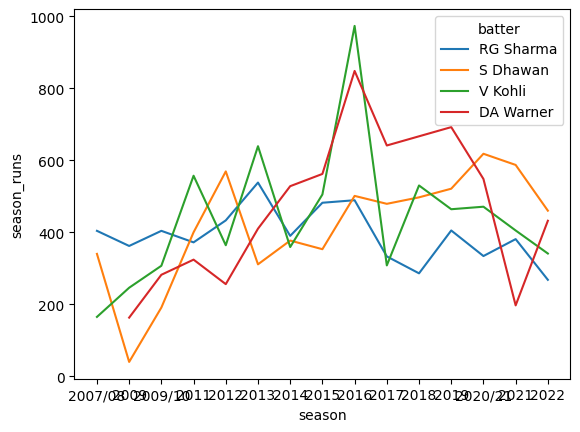

In [44]:
sns.lineplot(data=batsman_season_performance, x="season", y="season_runs", hue="batter")

In [45]:
query = """
    SELECT ID,
           bowler, 
           CASE 
               WHEN SUM(isWicketDelivery) OVER (ORDER BY ballnumber ROWS BETWEEN 2 PRECEDING AND 1 FOLLOWING) == 3 THEN 1
               ELSE 0
           END AS is_hattrick
    FROM balls
"""
pd.read_sql(query, engine)

,ID,bowler,is_hattrick
0,1312200,Mohammed Shami,0
1,1312200,Yash Dayal,0
2,1312200,Mohammed Shami,0
3,1312200,Yash Dayal,0
4,1312200,LH Ferguson,0
...,...,...,...
225949,548334,P Awana,0
225950,419152,PJ Sangwan,0
225951,419141,SR Watson,0
225952,336024,DP Vijaykumar,0


# Win Margin Stats


In [46]:
query = """
with season_margin_stats AS (
    SELECT Season, WinningTeam, SUM(margin) AS total_margin
    FROM matches
    WHERE WonBy = 'Runs'
    GROUP BY 1, 2
)
SELECT WinningTeam, SUM(total_margin) AS overall_margin
FROM (SELECT DISTINCT Team1 FROM matches) AS teams LEFT JOIN season_margin_stats
ON Team1 = WinningTeam
GROUP BY 1
"""
margin_stats = pd.read_sql(query, engine)
margin_stats

,WinningTeam,overall_margin
0,Chennai Super Kings,2104.0
1,Deccan Chargers,421.0
2,Delhi Capitals,404.0
3,Delhi Daredevils,675.0
4,Gujarat Lions,1.0
5,Gujarat Titans,121.0
6,Kings XI Punjab,1034.0
7,Kochi Tuskers Kerala,23.0
8,Kolkata Knight Riders,1456.0
9,Lucknow Super Giants,169.0
